In [1]:
import scanpy as sc
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import scib_metrics
from scib_metrics.benchmark import Benchmarker

In [3]:
adata = sc.read_h5ad("../data/GSE112294/WagnerScience2018.h5ad")

In [4]:
adata

AnnData object with n_obs × n_vars = 63530 × 30677
    obs: 'n_counts', 'unique_cell_id', 'cell_names', 'library_id', 'batch', 'ClusterID', 'ClusterName', 'TissueID', 'TissueName', 'TimeID'

In [5]:
methods = ['pca_umap', 'seurat_rpca_umap', 'harmony_umap', 'limma_umap', 'bcd_umap']
sample = 'gse112294_lib'

# metadata = pd.read_csv(f"../output-embeddings/gse112294_label.csv", index_col=0)

In [6]:
embs = {}
for m in methods:
    embs[m] = pd.read_csv(f"../output-embeddings/{sample}_{m}.csv", index_col=0)

In [7]:
label = 'celltype'
batch = "TimeID"
use_cosine = []

In [8]:
for m in methods:
    matrix_name = m
    adata.obsm[matrix_name] = embs[m].to_numpy()

In [9]:
adata

AnnData object with n_obs × n_vars = 63530 × 30677
    obs: 'n_counts', 'unique_cell_id', 'cell_names', 'library_id', 'batch', 'ClusterID', 'ClusterName', 'TissueID', 'TissueName', 'TimeID'
    obsm: 'pca_umap', 'seurat_rpca_umap', 'harmony_umap', 'limma_umap', 'bcd_umap'

In [10]:
adata.obs['TimeID2'] = adata.obs['TimeID'].apply(lambda x: '0' + x if len(x) == 4 else x).astype(str)

In [11]:
adata = adata[~(adata.obs['TissueName'] == 'NaN'), :]

C:\Users\lshh\miniconda3\envs\py39_integration\lib\site-packages\anndata\_core\anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


C:\Users\lshh\miniconda3\envs\py39_integration\lib\site-packages\anndata\_core\anndata.py:1230: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
C:\Users\lshh\miniconda3\envs\py39_integration\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
C:\Users\lshh\miniconda3\envs\py39_integration\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
C:\Users\lshh\miniconda3\envs\py39_integration\lib\site-packages\scanpy\plotting\_tools\scatterplot

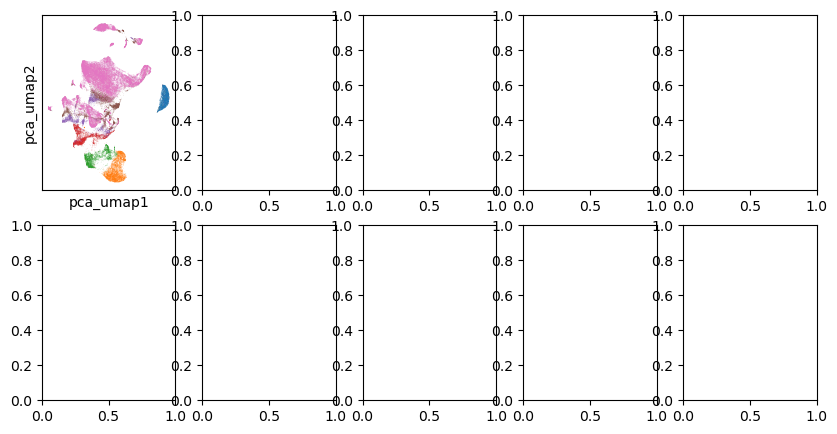

C:\Users\lshh\miniconda3\envs\py39_integration\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
C:\Users\lshh\miniconda3\envs\py39_integration\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
C:\Users\lshh\miniconda3\envs\py39_integration\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
C:\Users\lshh\miniconda3\envs\py39_integration\lib\site-packages\scanpy\plotting\_tools\scatte

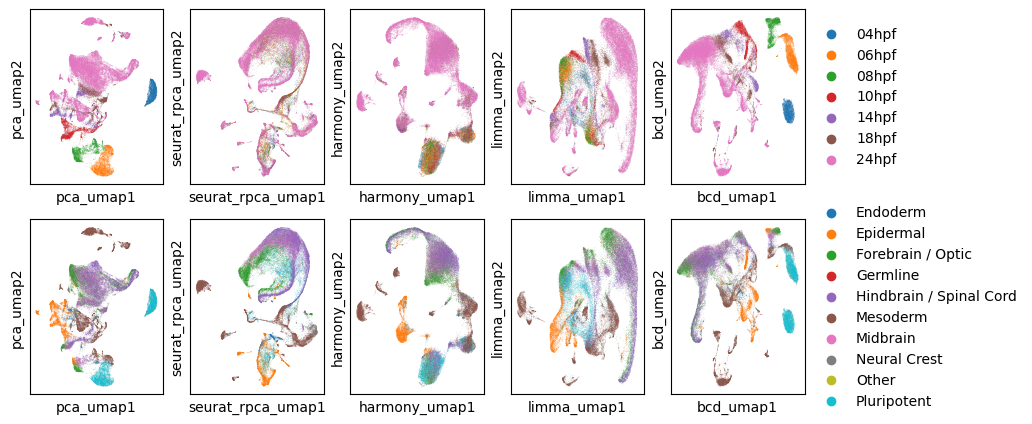

<Figure size 640x480 with 0 Axes>

In [12]:
fig, axes = plt.subplots(2, len(methods), figsize=(10, 5))
for i, m in enumerate(methods):
    legend_loc = None if i < 4 else 'right margin'
    sc.pl.embedding(adata, m, color='TimeID2', ax=axes[0][i], legend_loc=legend_loc, title='', legend_fontsize=10, 
                    alpha=0.5, size=0.5)
    sc.pl.embedding(adata, m, color='TissueName', ax=axes[1][i], legend_loc=legend_loc, title='', legend_fontsize=10, 
                    alpha=0.5, size=0.5)
    
plt.tight_layout(pad=1.5)
fig

In [13]:
fig.savefig("../figures/gse112294.png", dpi=300, bbox_inches='tight')